In [4]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

Last 5 X features:
tensor([[ 0.0476, -0.8667],
        [ 1.0818, -0.0557],
        [-0.5864,  0.7695],
        ...,
        [-0.1066, -1.0471],
        [ 0.8323, -0.8111],
        [-0.7385, -0.3467]])
\Last 5 y labels:
tensor([0., 0., 1.,  ..., 0., 0., 0.])


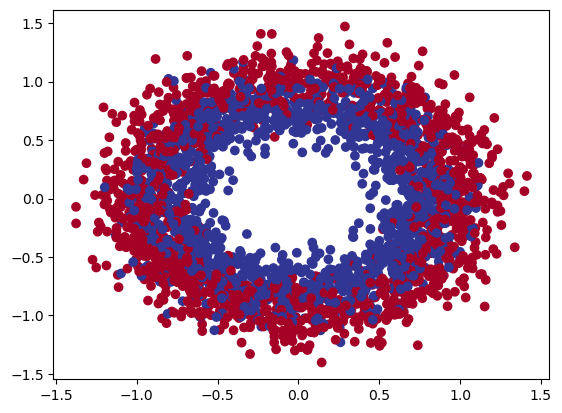

In [5]:
from sklearn.datasets import make_circles
# Make 2000 samples 
n_samples = 3000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.15, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values
# Turn data into tensors
# Otherwise this causes issues with computations later on
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
print(f"Last 5 X features:\n{X[5:]}") # Wink wink numpy slicing
print(f"\Last 5 y labels:\n{y[5:]}")
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [6]:
# exercise 1:
print(f"Feature shape: {X.shape}")
print(f"Label shape: {y.shape}\n")

print(f"Second dimension of X (the xOy coordinates of the dots): {X.shape[1]}\n")

print(f"First 10 feature values:\n{X[:10]}")
print(f"First 10 label values:\n{y[:10]}")

Feature shape: torch.Size([3000, 2])
Label shape: torch.Size([3000])

Second dimension of X (the xOy coordinates of the dots): 2

First 10 feature values:
tensor([[ 0.0470,  0.6750],
        [ 0.1261, -1.0087],
        [ 0.3886,  0.7199],
        [ 0.4397,  0.8657],
        [-0.4462, -0.7112],
        [ 0.0476, -0.8667],
        [ 1.0818, -0.0557],
        [-0.5864,  0.7695],
        [-0.2543,  1.3042],
        [-0.2103, -0.8275]])
First 10 label values:
tensor([1., 0., 1., 0., 1., 0., 0., 1., 0., 1.])


In [7]:
# exercise 2:
from sklearn.model_selection import train_test_split

y = y.unsqueeze(1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

In [9]:
# exercise 3:
class CirclePerceptron(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(CirclePerceptron, self).__init__()
        # Takes in {input_dim}  features (X), produces {output_dim} features in two layers
        self.hidden = torch.nn.Linear(input_dim, hidden_dim)
        self.linear = torch.nn.Linear(hidden_dim, output_dim) 
        
    def forward(self, x):
        # Takes in the computation through the linear layers and the resulting features
        x = self.linear(self.hidden(x)) 
        return x

# Create model
model_circle = CirclePerceptron(2, 5, output_dim=1)

# Move model to GPU
if torch.cuda.is_available():
    model_circle.to('cuda')

In [10]:
# exercise 4:
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_circle.parameters(), lr=0.1)

test_output = model_circle(X)
print(test_output)

tensor([[-0.0049],
        [-0.0285],
        [-0.0491],
        ...,
        [ 0.0015],
        [-0.1190],
        [ 0.0895]], grad_fn=<AddmmBackward0>)


In [12]:
# exercise 5:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc
num_epochs = 4000
loss_values = []
acc_values = []
for epoch in range(num_epochs):
    y_pred = model_circle(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Save the loss and accuracy values every 10 epochs
    if (epoch + 1) % 10 == 0:
        loss_values.append(loss.item()) # This is so that we can look at an image of our loss
        acc_values.append(accuracy_fn(y_train, y_pred))
    
    # Print the loss every 100 epochs
    loss_values.append(loss.item()) # This is so that we can look at an image of our loss
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/4000], Loss: 0.6926
Epoch [200/4000], Loss: 0.6926
Epoch [300/4000], Loss: 0.6926
Epoch [400/4000], Loss: 0.6925
Epoch [500/4000], Loss: 0.6925
Epoch [600/4000], Loss: 0.6925
Epoch [700/4000], Loss: 0.6925
Epoch [800/4000], Loss: 0.6925
Epoch [900/4000], Loss: 0.6925
Epoch [1000/4000], Loss: 0.6925
Epoch [1100/4000], Loss: 0.6925
Epoch [1200/4000], Loss: 0.6925
Epoch [1300/4000], Loss: 0.6925
Epoch [1400/4000], Loss: 0.6925
Epoch [1500/4000], Loss: 0.6925
Epoch [1600/4000], Loss: 0.6925
Epoch [1700/4000], Loss: 0.6925
Epoch [1800/4000], Loss: 0.6925
Epoch [1900/4000], Loss: 0.6925
Epoch [2000/4000], Loss: 0.6925
Epoch [2100/4000], Loss: 0.6925
Epoch [2200/4000], Loss: 0.6925
Epoch [2300/4000], Loss: 0.6925
Epoch [2400/4000], Loss: 0.6925
Epoch [2500/4000], Loss: 0.6925
Epoch [2600/4000], Loss: 0.6925
Epoch [2700/4000], Loss: 0.6925
Epoch [2800/4000], Loss: 0.6925
Epoch [2900/4000], Loss: 0.6925
Epoch [3000/4000], Loss: 0.6925
Epoch [3100/4000], Loss: 0.6925
Epoch [3200/4000]

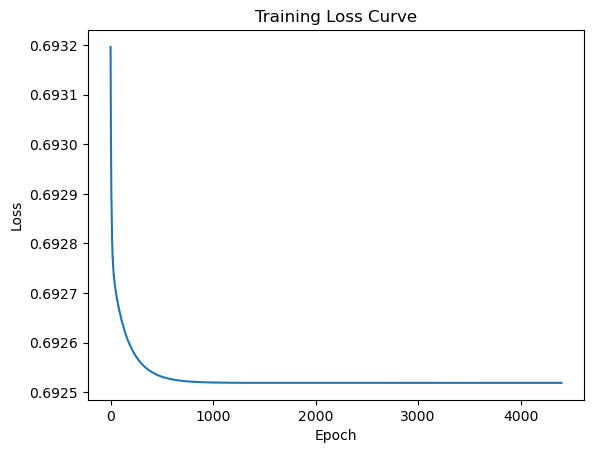

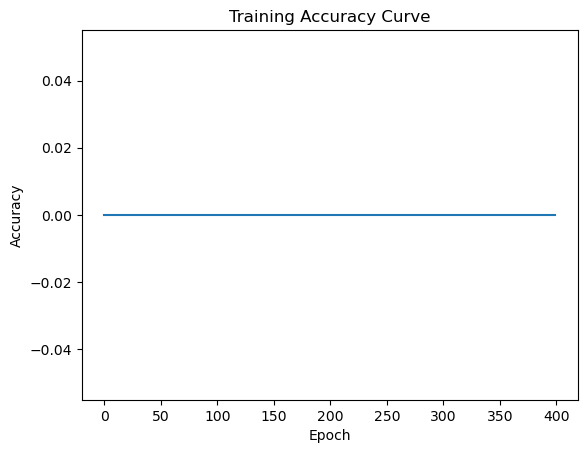

In [13]:
# exercise 5:
from typing import List
def plot_loss(loss_values: List[float]):
    plt.plot(loss_values)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.show()
    
plot_loss(loss_values)

def plot_acc(acc_values: List[float]):
    plt.plot(acc_values)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy Curve')
    plt.show()
    
plot_acc(acc_values)

NameError: name 'plot_decision_boundary' is not defined

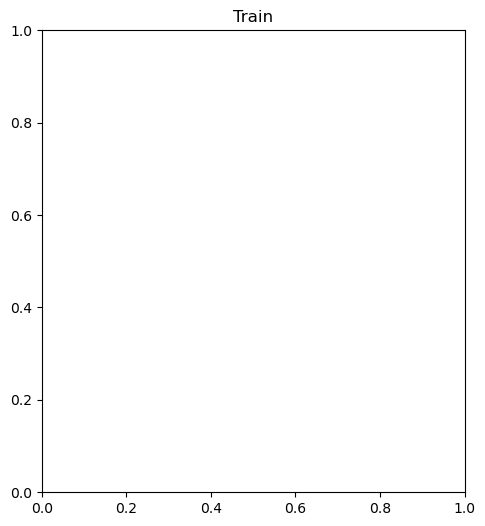

In [14]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_circle, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_circle, X_test, y_test)